In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from typing import List

font = {'family' : 'normal',
        "weight" : "normal",
        'size'   : 8}

matplotlib.rc('font', **font)


In [2]:
environment = "BlocksNormal"

metric1_run1 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 1 - DQN nostack-normal-tag-EvalMinReturn.csv".format(environment))
metric1_run2 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 3 - DQN stack-normal-tag-EvalMinReturn.csv".format(environment))
metric1_run3 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 5 - DQN stack-depth-tag-EvalMinReturn.csv".format(environment))

metric2_run1 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 1 - DQN nostack-normal-tag-EvalMaxReturn.csv".format(environment))
metric2_run2 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 3 - DQN stack-normal-tag-EvalMaxReturn.csv".format(environment))
metric2_run3 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 5 - DQN stack-depth-tag-EvalMaxReturn.csv".format(environment))

metric3_run1 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 1 - DQN nostack-normal-tag-EvalAverageReturn.csv".format(environment))
metric3_run2 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 3 - DQN stack-normal-tag-EvalAverageReturn.csv".format(environment))
metric3_run3 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 5 - DQN stack-depth-tag-EvalAverageReturn.csv".format(environment))

metric4_run1 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 1 - DQN nostack-normal-tag-TrainAverageReturn.csv".format(environment))
metric4_run2 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 3 - DQN stack-normal-tag-TrainAverageReturn.csv".format(environment))
metric4_run3 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 5 - DQN stack-depth-tag-TrainAverageReturn.csv".format(environment))

metric5_run1 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 1 - DQN nostack-normal-tag-TrainAVGEpisodeLength.csv".format(environment))
metric5_run2 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 3 - DQN stack-normal-tag-TrainAVGEpisodeLength.csv".format(environment))
metric5_run3 = pd.read_csv("data/{}/run-logs_BlocksNormal Run 5 - DQN stack-depth-tag-TrainAVGEpisodeLength.csv".format(environment))


experiment1 = pd.DataFrame(data = {"Run_1": metric1_run1["Value"], "Run_2": metric1_run2["Value"], "Run_3": metric1_run3["Value"]})
experiment2 = pd.DataFrame(data = {"Run_1": metric2_run1["Value"], "Run_2": metric2_run2["Value"], "Run_3": metric2_run3["Value"]})
experiment3 = pd.DataFrame(data = {"Run_1": metric3_run1["Value"], "Run_2": metric3_run2["Value"], "Run_3": metric3_run3["Value"]})
experiment4 = pd.DataFrame(data = {"Run_1": metric4_run1["Value"], "Run_2": metric4_run2["Value"], "Run_3": metric4_run3["Value"]})
experiment5 = pd.DataFrame(data = {"Run_1": metric5_run1["Value"], "Run_2": metric5_run2["Value"], "Run_3": metric5_run3["Value"]})

In [3]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]                                        # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

experiment1['Run1'] = smooth(experiment1['Run_1'], 0.85)
experiment1['Run2'] = smooth(experiment1['Run_2'], 0.85)
experiment1['Run3'] = smooth(experiment1['Run_3'], 0.85)

experiment2['Run1'] = smooth(experiment2['Run_1'], 0.85)
experiment2['Run2'] = smooth(experiment2['Run_2'], 0.85)
experiment2['Run3'] = smooth(experiment2['Run_3'], 0.85)

experiment3['Run1'] = smooth(experiment3['Run_1'], 0.85)
experiment3['Run2'] = smooth(experiment3['Run_2'], 0.85)
experiment3['Run3'] = smooth(experiment3['Run_3'], 0.85)

experiment4['Run1'] = smooth(experiment4['Run_1'], 0.99)
experiment4['Run2'] = smooth(experiment4['Run_2'], 0.99)
experiment4['Run3'] = smooth(experiment4['Run_3'], 0.99)

experiment5['Run1'] = smooth(experiment5['Run_1'], 0.99)
experiment5['Run2'] = smooth(experiment5['Run_2'], 0.99)
experiment5['Run3'] = smooth(experiment5['Run_3'], 0.99)


No handles with labels found to put in legend.


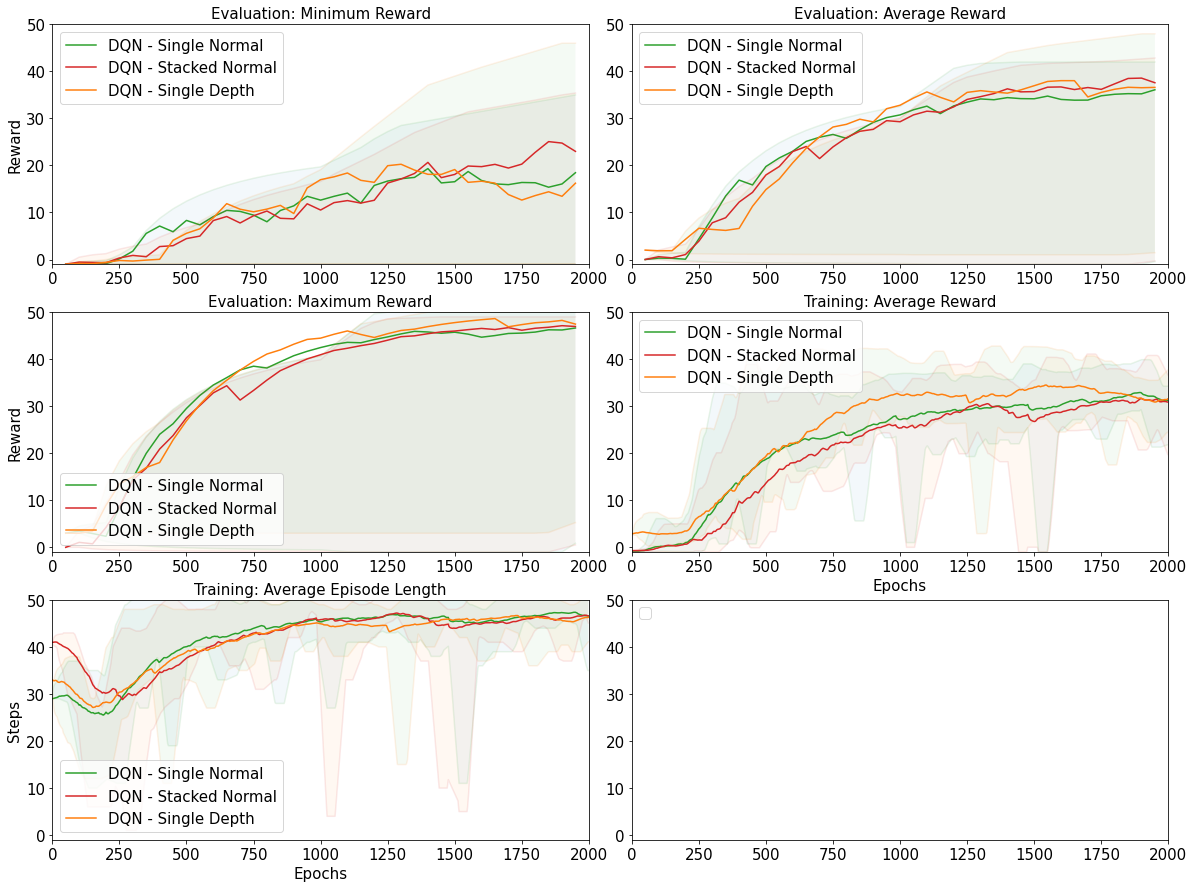

In [11]:
#min_max_roll    = 10
#mean_roll       = 5



min_max_roll    = 35
mean_roll       = 20

experiment1['Run1_lower'] = experiment1['Run_1'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment1['Run2_lower'] = experiment1['Run_2'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment1['Run3_lower'] = experiment1['Run_3'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()

experiment1['Run1_upper'] = experiment1['Run_1'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment1['Run2_upper'] = experiment1['Run_2'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment1['Run3_upper'] = experiment1['Run_3'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()


experiment2['Run1_lower'] = experiment2['Run_1'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment2['Run2_lower'] = experiment2['Run_2'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment2['Run3_lower'] = experiment2['Run_3'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()

experiment2['Run1_upper'] = experiment2['Run_1'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment2['Run2_upper'] = experiment2['Run_2'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment2['Run3_upper'] = experiment2['Run_3'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()


experiment3['Run1_lower'] = experiment3['Run_1'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment3['Run2_lower'] = experiment3['Run_2'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment3['Run3_lower'] = experiment3['Run_3'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()

experiment3['Run1_upper'] = experiment3['Run_1'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment3['Run2_upper'] = experiment3['Run_2'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment3['Run3_upper'] = experiment3['Run_3'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()


experiment4['Run1_lower'] = experiment4['Run_1'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment4['Run2_lower'] = experiment4['Run_2'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment4['Run3_lower'] = experiment4['Run_3'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()

experiment4['Run1_upper'] = experiment4['Run_1'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment4['Run2_upper'] = experiment4['Run_2'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment4['Run3_upper'] = experiment4['Run_3'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()


experiment5['Run1_lower'] = experiment5['Run_1'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment5['Run2_lower'] = experiment5['Run_2'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()
experiment5['Run3_lower'] = experiment5['Run_3'].rolling(min_max_roll, min_periods=1).min().rolling(mean_roll, min_periods=1).mean()

experiment5['Run1_upper'] = experiment5['Run_1'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment5['Run2_upper'] = experiment5['Run_2'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()
experiment5['Run3_upper'] = experiment5['Run_3'].rolling(min_max_roll, min_periods=1).max().rolling(mean_roll, min_periods=1).mean()





fig, axs = plt.subplots(3,2, figsize=(20,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.08, hspace=0.2)
custom_ylim = (-1, 50)
custom_xlim = (0, 2000)

x = experiment1['Run1'].index * 50 + 50

axs[0,0].plot(x, experiment1['Run1'], label='DQN - Single Normal', color='tab:green')
axs[0,0].plot(x, experiment1['Run1_lower'], color='tab:green', alpha=0.1)
axs[0,0].plot(x, experiment1['Run1_upper'], color='tab:green', alpha=0.1)
axs[0,0].fill_between(x, experiment1['Run1_lower'], experiment1['Run1_upper'], alpha=0.05)
axs[0,0].plot(x, experiment1['Run2'], label='DQN - Stacked Normal', color='tab:red')
axs[0,0].plot(x, experiment1['Run2_lower'], color='tab:red', alpha=0.1)
axs[0,0].plot(x, experiment1['Run2_upper'], color='tab:red', alpha=0.1)
axs[0,0].fill_between(x, experiment1['Run2_lower'], experiment1['Run2_upper'], alpha=0.05)
axs[0,0].plot(x, experiment1['Run3'], label='DQN - Single Depth', color='tab:orange')
axs[0,0].plot(x, experiment1['Run3_lower'], color='tab:orange', alpha=0.1)
axs[0,0].plot(x, experiment1['Run3_upper'], color='tab:orange', alpha=0.1)
axs[0,0].fill_between(x, experiment1['Run3_lower'], experiment1['Run3_upper'], alpha=0.05)

axs[1,0].plot(x, experiment2['Run1'], label='DQN - Single Normal', color='tab:green')
axs[1,0].plot(x, experiment2['Run1_lower'], color='tab:green', alpha=0.1)
axs[1,0].plot(x, experiment2['Run1_upper'], color='tab:green', alpha=0.1)
axs[1,0].fill_between(x, experiment2['Run1_lower'], experiment2['Run1_upper'], alpha=0.05)
axs[1,0].plot(x, experiment2['Run2'], label='DQN - Stacked Normal', color='tab:red')
axs[1,0].plot(x, experiment2['Run2_lower'], color='tab:red', alpha=0.1)
axs[1,0].plot(x, experiment2['Run2_upper'], color='tab:red', alpha=0.1)
axs[1,0].fill_between(x, experiment2['Run2_lower'], experiment2['Run2_upper'], alpha=0.05)
axs[1,0].plot(x, experiment2['Run3'], label='DQN - Single Depth', color='tab:orange')
axs[1,0].plot(x, experiment2['Run3_lower'], color='tab:orange', alpha=0.1)
axs[1,0].plot(x, experiment2['Run3_upper'], color='tab:orange', alpha=0.1)
axs[1,0].fill_between(x, experiment2['Run3_lower'], experiment2['Run3_upper'], alpha=0.05)

axs[0,1].plot(x, experiment3['Run1'], label='DQN - Single Normal', color='tab:green')
axs[0,1].plot(x, experiment3['Run1_lower'], color='tab:green', alpha=0.1)
axs[0,1].plot(x, experiment3['Run1_upper'], color='tab:green', alpha=0.1)
axs[0,1].fill_between(x, experiment3['Run1_lower'], experiment3['Run1_upper'], alpha=0.05)
axs[0,1].plot(x, experiment3['Run2'], label='DQN - Stacked Normal', color='tab:red')
axs[0,1].plot(x, experiment3['Run2_lower'], color='tab:red', alpha=0.1)
axs[0,1].plot(x, experiment3['Run2_upper'], color='tab:red', alpha=0.1)
axs[0,1].fill_between(x, experiment3['Run2_lower'], experiment3['Run2_upper'], alpha=0.05)
axs[0,1].plot(x, experiment3['Run3'], label='DQN - Single Depth', color='tab:orange')
axs[0,1].plot(x, experiment3['Run3_lower'], color='tab:orange', alpha=0.1)
axs[0,1].plot(x, experiment3['Run3_upper'], color='tab:orange', alpha=0.1)
axs[0,1].fill_between(x, experiment3['Run3_lower'], experiment3['Run3_upper'], alpha=0.05)


x = experiment4['Run1'].index * 2

axs[1,1].plot(x, experiment4['Run1'], label='DQN - Single Normal', color='tab:green')
axs[1,1].plot(x, experiment4['Run1_lower'], color='tab:green', alpha=0.1)
axs[1,1].plot(x, experiment4['Run1_upper'], color='tab:green', alpha=0.1)
axs[1,1].fill_between(x, experiment4['Run1_lower'], experiment4['Run1_upper'], alpha=0.05)
axs[1,1].plot(x, experiment4['Run2'], label='DQN - Stacked Normal', color='tab:red')
axs[1,1].plot(x, experiment4['Run2_lower'], color='tab:red', alpha=0.1)
axs[1,1].plot(x, experiment4['Run2_upper'], color='tab:red', alpha=0.1)
axs[1,1].fill_between(x, experiment4['Run2_lower'], experiment4['Run2_upper'], alpha=0.05)
axs[1,1].plot(x, experiment4['Run3'], label='DQN - Single Depth', color='tab:orange')
axs[1,1].plot(x, experiment4['Run3_lower'], color='tab:orange', alpha=0.1)
axs[1,1].plot(x, experiment4['Run3_upper'], color='tab:orange', alpha=0.1)
axs[1,1].fill_between(x, experiment4['Run3_lower'], experiment4['Run3_upper'], alpha=0.05)


axs[2,0].plot(x, experiment5['Run1'], label='DQN - Single Normal', color='tab:green')
axs[2,0].plot(x, experiment5['Run1_lower'], color='tab:green', alpha=0.1)
axs[2,0].plot(x, experiment5['Run1_upper'], color='tab:green', alpha=0.1)
axs[2,0].fill_between(x, experiment5['Run1_lower'], experiment5['Run1_upper'], alpha=0.05)
axs[2,0].plot(x, experiment5['Run2'], label='DQN - Stacked Normal', color='tab:red')
axs[2,0].plot(x, experiment5['Run2_lower'], color='tab:red', alpha=0.1)
axs[2,0].plot(x, experiment5['Run2_upper'], color='tab:red', alpha=0.1)
axs[2,0].fill_between(x, experiment5['Run2_lower'], experiment5['Run2_upper'], alpha=0.05)
axs[2,0].plot(x, experiment5['Run3'], label='DQN - Single Depth', color='tab:orange')
axs[2,0].plot(x, experiment5['Run3_lower'], color='tab:orange', alpha=0.1)
axs[2,0].plot(x, experiment5['Run3_upper'], color='tab:orange', alpha=0.1)
axs[2,0].fill_between(x, experiment5['Run3_lower'], experiment5['Run3_upper'], alpha=0.05)

size = 15
axs[2,0].set_xlabel('Epochs', fontsize=size)
axs[0,0].set_ylabel('Reward', fontsize=size)
axs[1,0].set_ylabel('Reward', fontsize=size)
axs[2,0].set_ylabel('Steps', fontsize=size)

axs[2,0].set_xlabel('Epochs', fontsize=size)
axs[1,1].set_xlabel('Epochs', fontsize=size)


axs[0,0].set_title("Evaluation: Minimum Reward",  fontsize=size)
axs[1,0].set_title("Evaluation: Maximum Reward", fontsize=size)
axs[0,1].set_title("Evaluation: Average Reward", fontsize=size)
axs[1,1].set_title("Training: Average Reward", fontsize=size)
axs[2,0].set_title("Training: Average Episode Length", fontsize=size)


plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)


for x in range(len(axs)):
    for y in range(len(axs[0])):
        axs[x,y].legend(loc='upper left',fontsize=size)
        axs[x,y].tick_params(axis='y', labelsize= size)
        axs[x,y].tick_params(axis='x', labelsize= size)

axs[2,0].legend(loc='lower left',fontsize=size)
axs[1,0].legend(loc='lower left',fontsize=size)


plt.savefig("figures\Training for {}".format(environment))
plt.show()